In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Watermelons.csv')
data.head()

,Numbering,color,root,knock,texture,navel,touch,density,sugar content,good melon
0,1,green,curl up,turbid sound,clear,Sag,hard slide,0.697,0.460,Yes
1,2,jet black,curl up,dull,clear,Sag,hard slide,0.774,0.376,Yes
2,3,jet black,curl up,turbid sound,clear,Sag,hard slide,0.634,0.264,Yes
3,4,green,curl up,dull,clear,Sag,hard slide,0.608,0.318,Yes
4,5,light white,curl up,turbid sound,clear,Sag,hard slide,0.556,0.215,Yes


In [ ]:
data.drop('Numbering', axis=1, inplace=True)
X=pd.get_dummies(data.drop(["good melon", 'color', 'root', 'navel', 'touch', 'density', 'sugar content'], axis=1))
y=data["good melon"]

display(X)

,knock_crisp,knock_dull,knock_turbid sound,texture_Vague,texture_clear,texture_slightly mushy
0,0,0,1,0,1,0
1,0,1,0,0,1,0
2,0,0,1,0,1,0
3,0,1,0,0,1,0
4,0,0,1,0,1,0
5,0,0,1,0,1,0
6,0,0,1,0,0,1
7,0,0,1,0,1,0
8,0,1,0,0,0,1
9,1,0,0,0,1,0


In [ ]:
X.shape

(17, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.8, shuffle=True)

In [ ]:
rfecv = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()

pipe = Pipeline([("Feature Selection", rfecv), ("Model", model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

In [ ]:
n_scores = cross_val_score(pipe, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
np.mean(n_scores)

0.82

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pd.DataFrame([model.predict(X_test), y_test])

,0,1,2,3
0,Yes,Yes,no,Yes
1,Yes,Yes,no,no


In [ ]:
pd.DataFrame([model.predict(X), y], index=['predictions', 'true value'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
predictions,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,no,Yes,no,no,Yes,no,Yes,no,no
true value,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,no,no,no,no,no,no,no,no,no


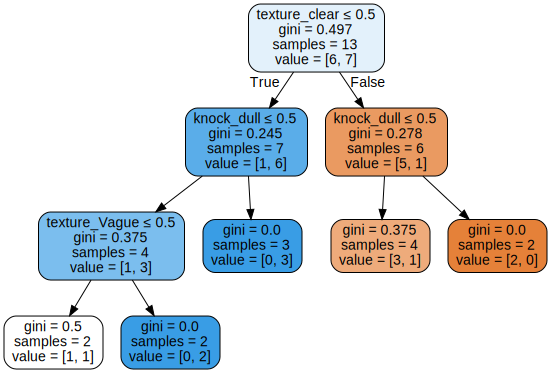

In [ ]:
import graphviz
with open ('tree_graph.dot', 'w') as file:
  dot_data = tree.export_graphviz(model, out_file=None, 
                        feature_names=X.columns, 
                        filled=True, rounded=True,
                        special_characters=True)  
    
graph = graphviz.Source(dot_data)
graph
